In [1]:
# lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from IPython.display import Image
from scipy.stats import spearmanr


## Le basi di Neutron Monitor

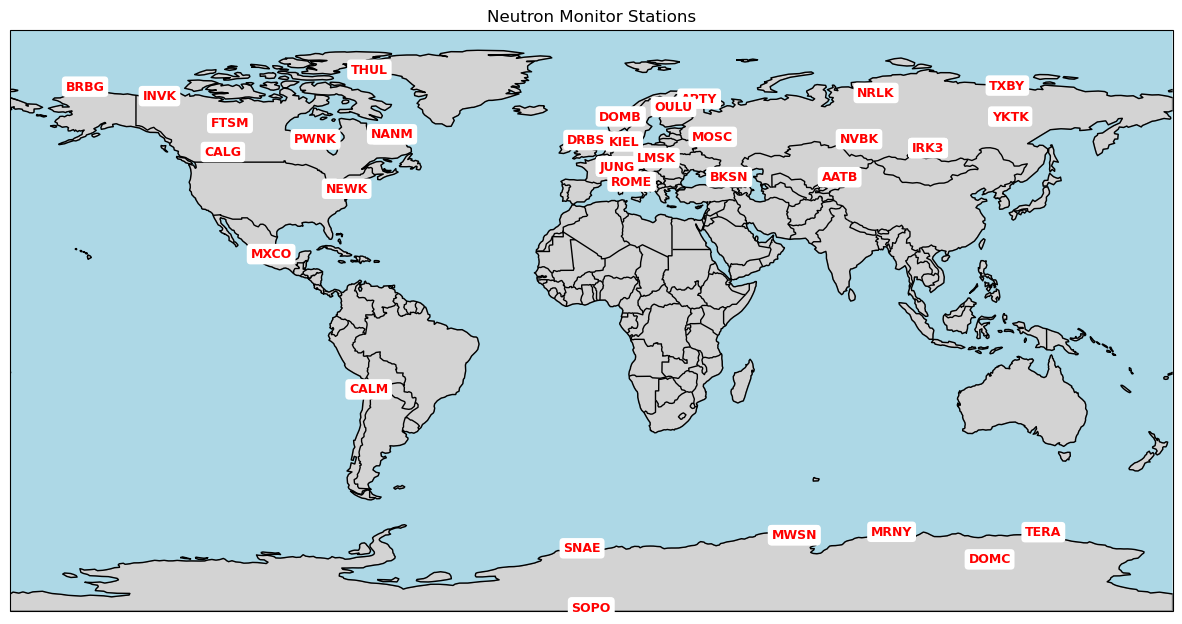

In [2]:
Image(filename='figures/stations.png', width=800, height=800)

In [3]:
csv_file_path = 'neutron_monitor_stations.csv'
df = pd.read_csv(csv_file_path)
df

Station Code                    Location  Altitude (m)  \
0          AATB        Alma-Ata, Kazakhstan          3340   
1          APTY             Apatity, Russia           177   
2          BKSN       Baksan Valley, Russia          1700   
3          BRBG         Barrow, Alaska, USA             8   
4          CALG             Calgary, Canada          1128   
5          CALM               Calama, Chile          2265   
6          DOMB          Dome B, Antarctica          3233   
7          DOMC          Dome C, Antarctica          3233   
8          DRBS                  Durham, UK            50   
9          FTSM          Fort Smith, Canada           203   
10         INVK              Inuvik, Canada            15   
11         IRK2             Irkutsk, Russia           500   
12         IRK3             Irkutsk, Russia           500   
13         JBGO   Jungfraujoch, Switzerland          3475   
14         JUN1   Jungfraujoch, Switzerland          3475   
15         JUNG   Jungfraujoch, Switzerland          3475   
16         KIEL               Kiel, Germany            54   
17         LMSK     Lomnicky Štít, Slovakia          2634   
18         MOSC              Moscow, Russia           200   
19         MRNY           Mirny, Antarctica            30   
20         MWSB     Mawson Base, Antarctica            16   
21         MWSN  Mawson Station, Antarctica            16   
22         MXCO         Mexico City, Mexico          2277   
23         NAIN                Nain, Canada             7   
24         NANM                Nain, Canada             7   
25         NEWK       Newark, Delaware, USA            30   
26         NRLK             Norilsk, Russia            90   
27         NVBK         Novosibirsk, Russia           150   
28         OULU               Oulu, Finland            15   
29         PSNM           Peawanuck, Canada            52   
30         PWNK           Peawanuck, Canada            52   
31         ROME                 Rome, Italy            60   
32         SNAE           Sanae, Antarctica            52   
33         SOPB      South Pole, Antarctica          2835   
34         SOPO      South Pole, Antarctica          2835   
35         TERA    Terre Adélie, Antarctica            33   
36         THUL            Thule, Greenland            26   
37         TXBY           Tixie Bay, Russia            10   
38         YKTK             Yakutsk, Russia           130   

    Cutoff Rigidity (GV)  Latitude (°)  Longitude (°)  
0                   6.69         43.25          76.92  
1                   0.65         67.57          33.40  
2                   5.60         43.28          42.70  
3                   0.17         71.29        -156.76  
4                   1.08         51.05        -114.07  
5                  12.80        -22.46         -68.93  
6                   0.01        -70.10         123.35  
7                   0.01        -75.10         123.35  
8                   2.30         54.77          -1.58  
9                   0.30         60.02        -111.88  
10                  0.16         68.36        -133.72  
11                  3.60         52.28         104.30  
12                  3.60         52.28         104.30  
13                  4.46         46.55           7.98  
14                  4.46         46.55           7.98  
15                  4.46         46.55           7.98  
16                  2.36         54.32          10.12  
17                  3.84         49.19          20.22  
18                  2.43         55.75          37.62  
19                  0.03        -66.55          93.01  
20                  0.22        -67.60          62.87  
21                  0.22        -67.60          62.87  
22                  8.20         19.43         -99.13  
23                  0.30         56.54         -61.69  
24                  0.30         56.54         -61.69  
25                  2.40         39.68         -75.75  
26                  0.60         69.34          88

## Esercizio (ogni gruppo avrà un periodo da analizzare)
- Verificare se nel periodo analizzato si è verificato un evento solare intenso, osservando i conteggi di diverse basi di Neutron Monitor (in realtà la loro variazione rispetto ad una baseline)

- Abbiamo visto come è possibile riconoscere un **Ground Level Enhancement 'GLE'** (legato ad un solar flare)
- Un evento GLE viene registrato quando ci sono aumenti coincidenti nel tempo e statisticamente significativi dei tassi di conteggio di almeno due monitori di neutroni situati in posizioni differenti, tra cui almeno un monitor di neutroni vicino al livello del mare e un corrispondente aumento nel flusso di protoni misurato da un esperimento spaziale (Poluianov et al., 2017).


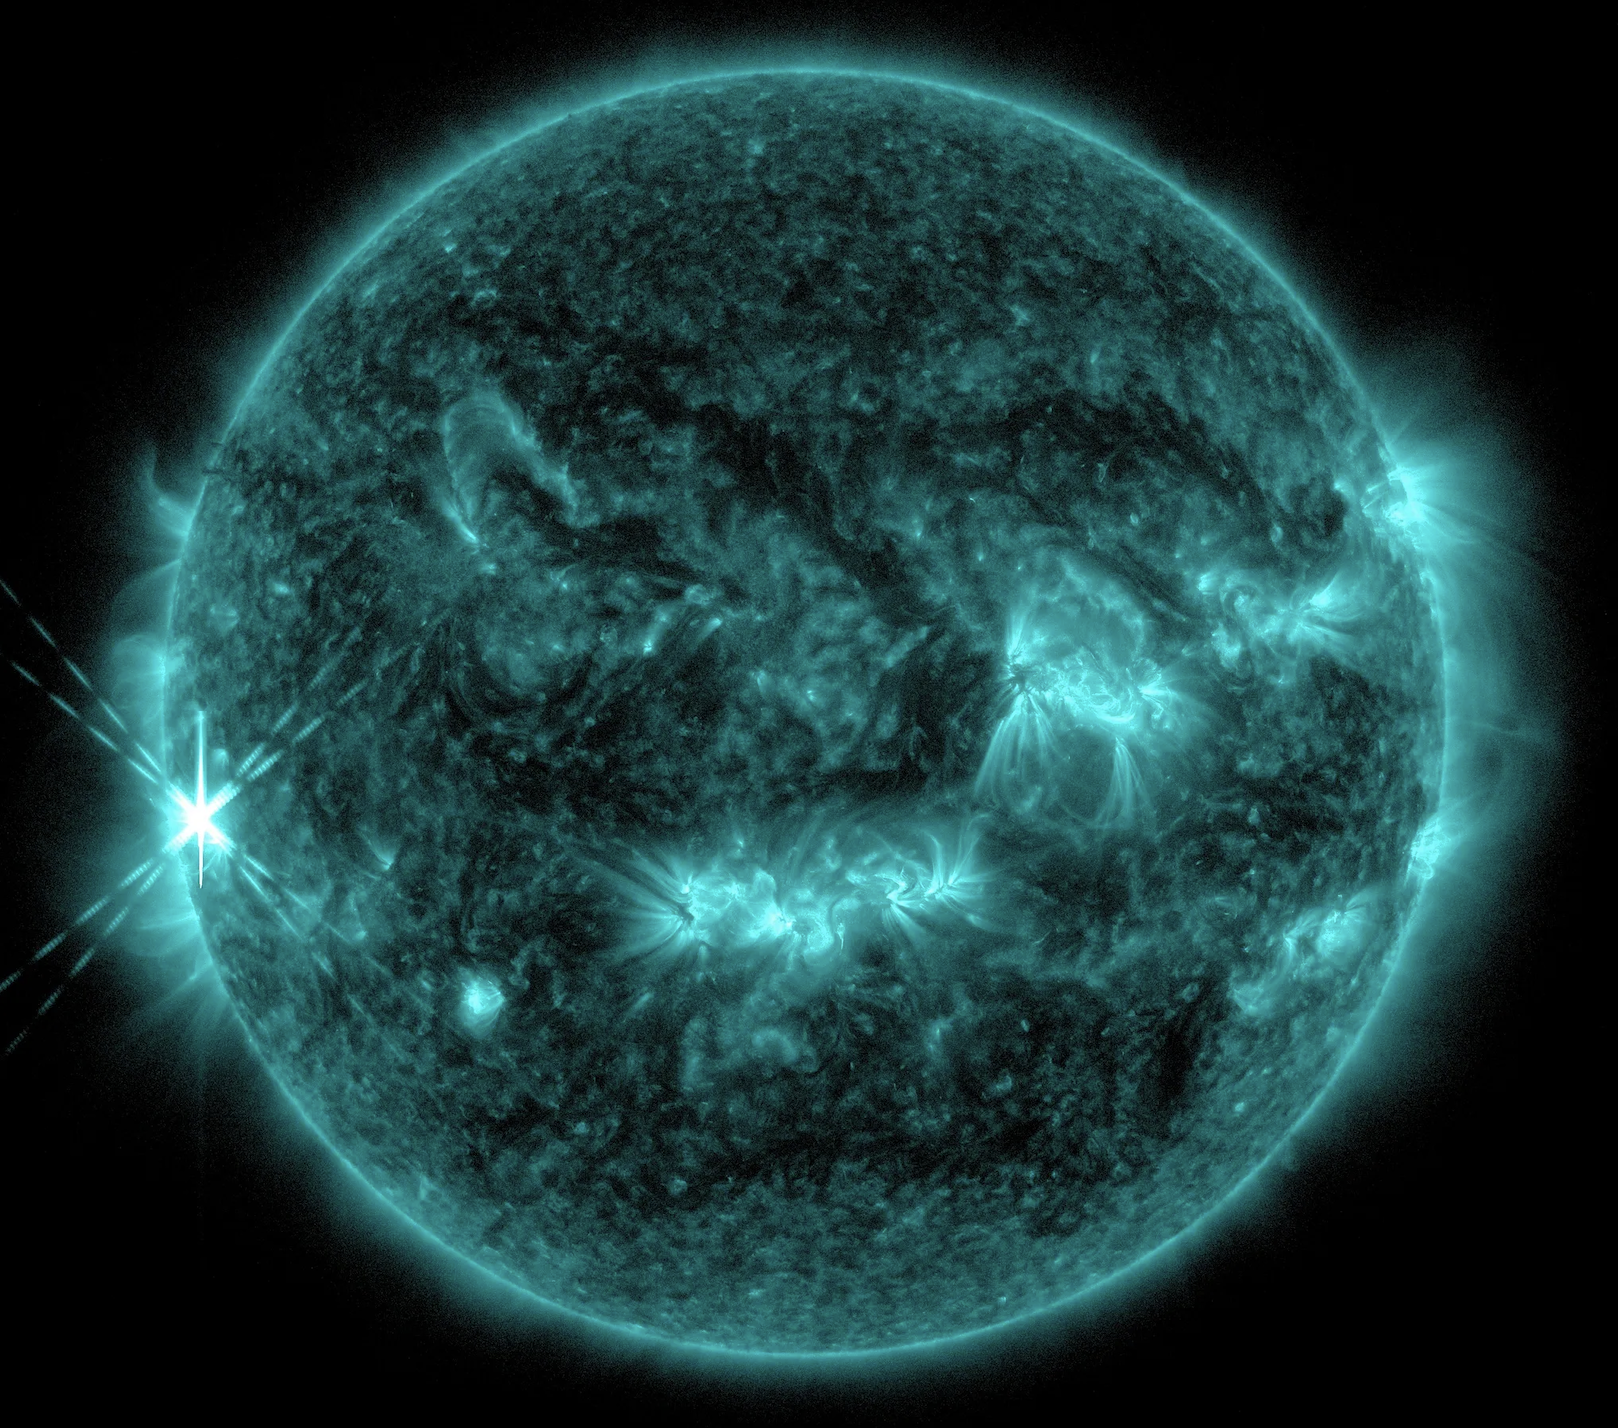

In [4]:
Image(filename='figures/flare.png', width=500, height=500)

## Scegli le basi 

In [5]:
base1 = 'oulu' 
# per aggiunger piu basi da visualizzare (uncomment)

base2 = 'sopo'
# base3 = '...'
# base4 = '...'

In [6]:
nm1 = f'GLE_74/c074{base1}.dat'
nm2 = f'GLE_74/c074{base2}.dat'
# nm3 = f'GLE_74/c074{base3}.dat'
# nm4 = f'GLE_74/c074{base4}.dat'

data_nm1 = pd.read_csv(nm1, skiprows=9, nrows=280, header=None, delim_whitespace=True, on_bad_lines='skip')
data_nm2 = pd.read_csv(nm2, skiprows=9, nrows=280, header=None, delim_whitespace=True, on_bad_lines='skip')
#data_nm3 = pd.read_csv(nm3, skiprows=9, nrows=280, header=None, delim_whitespace=True, on_bad_lines='skip')
#data_nm4 = pd.read_csv(nm4, skiprows=9, nrows=280, header=None, delim_whitespace=True, on_bad_lines='skip')


data_nm1 = data_nm1.replace(-999.00, np.nan)
data_nm2 = data_nm2.replace(-999.00, np.nan)
#data_nm3 = data_nm3.replace(-999.00, np.nan)
#data_nm4 = data_nm4.replace(-999.00, np.nan)


data_nm1 = data_nm1.dropna(axis=0)
data_nm2 = data_nm2.dropna(axis=0)
#data_nm3 = data_nm3.dropna(axis=0)
#data_nm4 = data_nm4.dropna(axis=0)


# data cleaning and preparation
data_nm1['DateTime'] = pd.to_datetime(data_nm1[1].astype(str) + ' ' + data_nm1[3].str[:6], format='%y%m%d %H%M%S')
data_nm1['Value'] = data_nm1[8]

data_nm2['DateTime'] = pd.to_datetime(data_nm2[1].astype(str) + ' ' + data_nm2[3].str[:6], format='%y%m%d %H%M%S')
data_nm2['Value'] = data_nm2[8]

# data_nm3['DateTime'] = pd.to_datetime(data_nm3[1].astype(str) + ' ' + data_nm3[3].str[:6], format='%y%m%d %H%M%S')
# data_nm3['Value'] = data_nm3[8]

# data_nm4['DateTime'] = pd.to_datetime(data_nm4[1].astype(str) + ' ' + data_nm4[3].str[:6], format='%y%m%d %H%M%S')
# data_nm4['Value'] = data_nm4[8]


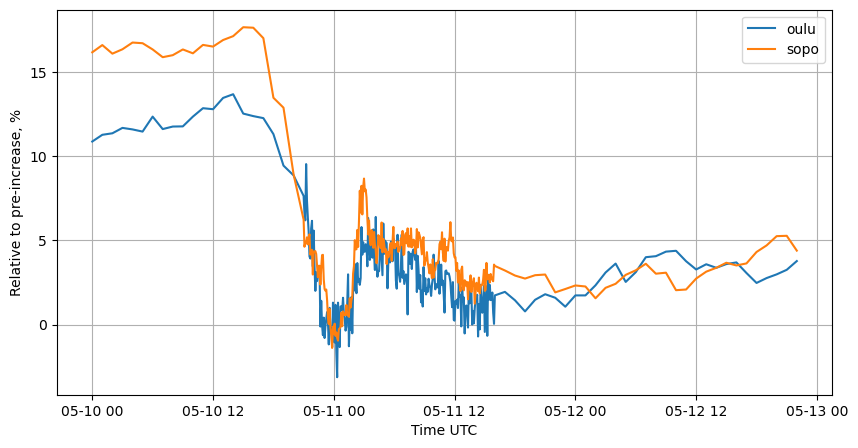

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(data_nm1['DateTime'], data_nm1['Value'], label=f'{base1}')
plt.plot(data_nm2['DateTime'], data_nm2['Value'], label=f'{base2}')
#plt.plot(data_nm3['DateTime'], data_nm3['Value'], label=f'{base3}')
#plt.plot(data_nm4['DateTime'], data_nm4['Value'], label=f'{base4}')
plt.xlabel('Time UTC')
plt.ylabel('Relative to pre-increase, %')
plt.legend()
plt.grid(True)
plt.show()

# Se nel perido osservato si identifica un GLE (secondo la definizione)
- stima la data di arrivo a Terra dell'evento solare:
- verifica se nella stessa data un esperimento spaziali ha misurato un aumento del flusso di protoni (un solar flare)

In [8]:
data_evento = '2024-05-10' #25 Maggio 2024

## Dati da Satellite
Per verificare il corrispondente aumento nel flusso di protoni misurato da un esperimento, usiamo i dati da **GOES** (Geostationary Operational Environmental Satellite)

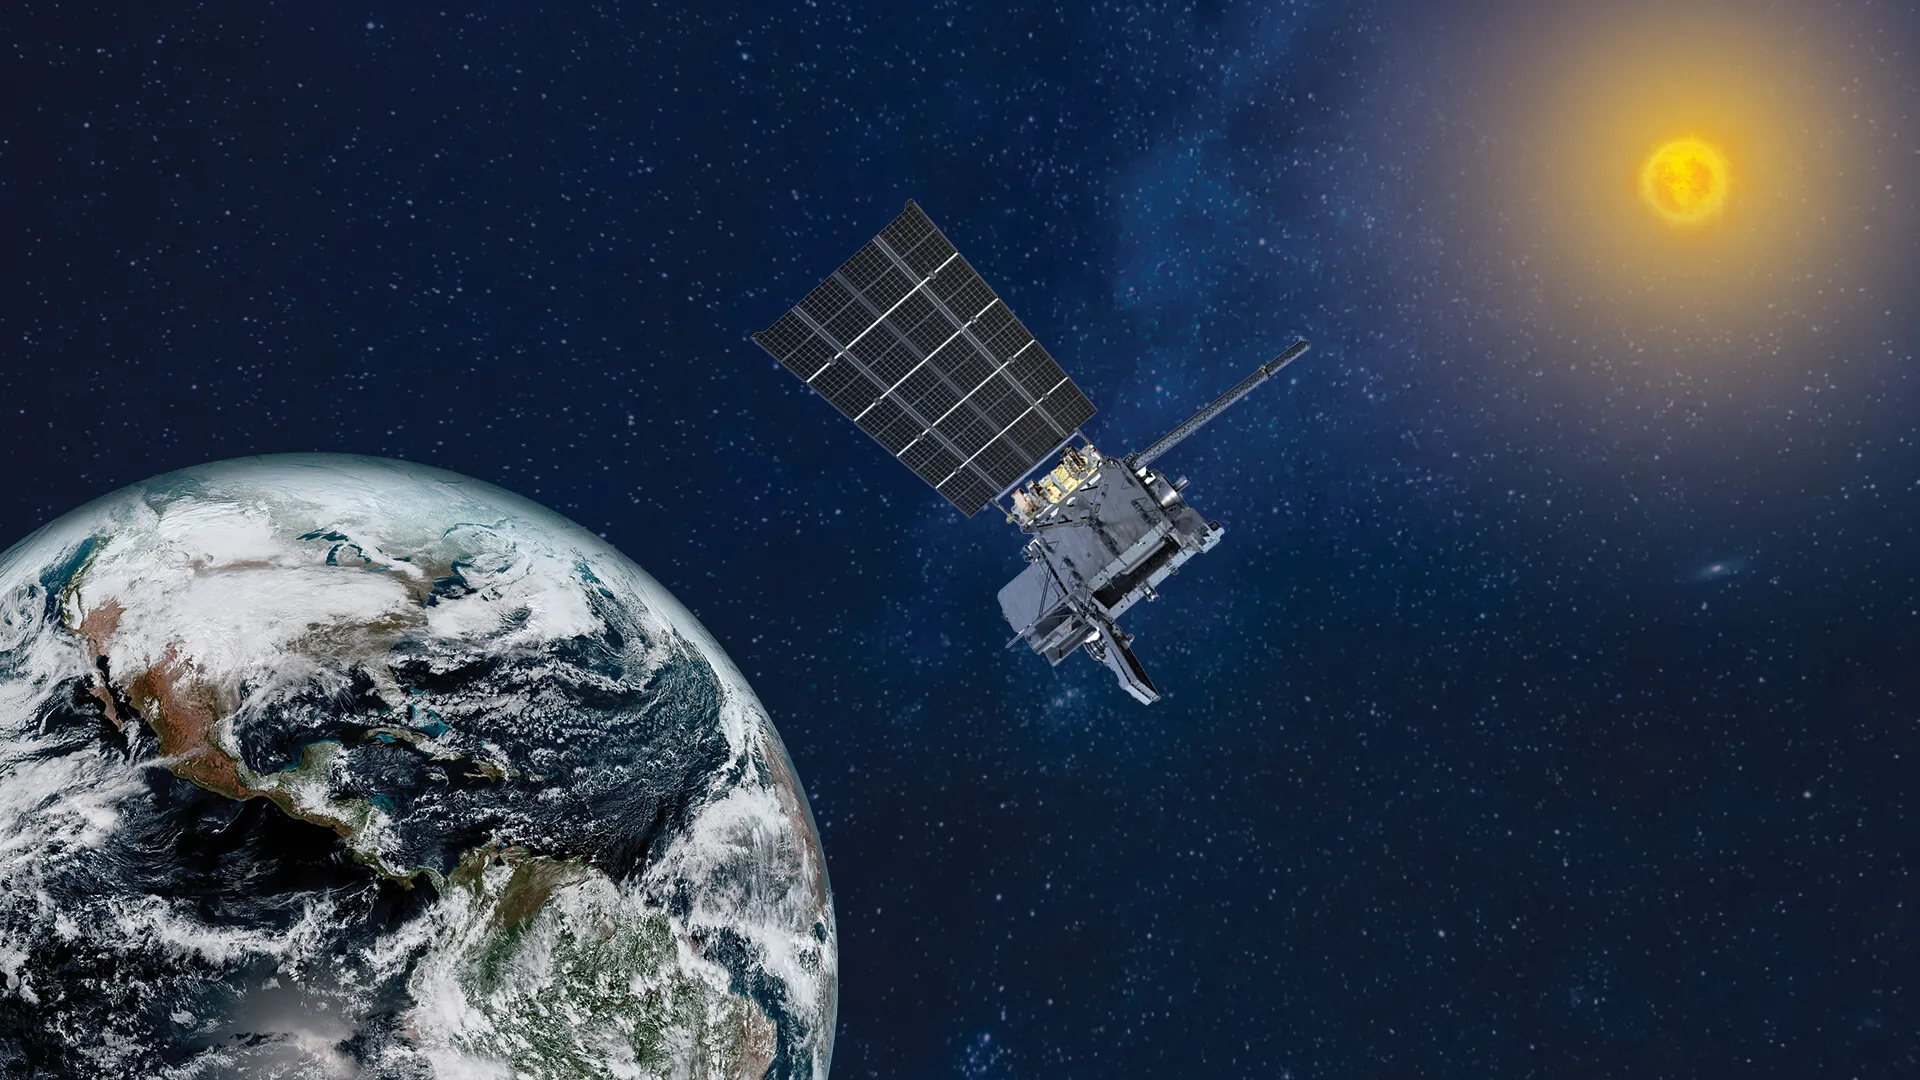

In [9]:
Image(filename='figures/goes.png', width=800, height=800)

- Verifica se nel giorno selezionato è stato osservato un flare solare da GOES

## Classificazione dei flare
| Solar Flare Class | Intensity $W/m^2$  |
|-------------------|------------------------------|
| B                 | $I < 10^{-6} $            |
| C                 | $ 10^{-6} < I < 10^{-5} $  |
| M                 | $ 10^{-5} < I < 10^{-4} $  |
| X                 | $ I > 10^{-4} $            |

In [10]:
tstart = data_evento + ' 00:00:00'
tend = data_evento + ' 23:59:59'

In [11]:
from sunpy.net import Fido
from sunpy.net import attrs as a

event_type = "FL"
result = Fido.search(a.Time(tstart, tend),
                     a.hek.EventType(event_type),
                     a.hek.FL.GOESCls > "M1.0",
                     a.hek.OBS.Observatory == "GOES")



# It"s also possible to access the HEK results from the
# `~sunpy.net.fido_factory.UnifiedResponse` by name.
hek_results = result["hek"]

filtered_results = hek_results["event_starttime", "event_peaktime",
                               "event_endtime", "fl_goescls", "ar_noaanum"]

by_magnitude = sorted(filtered_results, key=lambda x: ord(x['fl_goescls'][0]) + float(x['fl_goescls'][1:]), reverse=True)

for flare in by_magnitude:
    print(f"Class {flare['fl_goescls']} occurred on {flare['event_starttime']}")

Class X3.9 occurred on 2024-05-10 06:27:00.000
Class M5.9 occurred on 2024-05-10 13:58:00.000
Class M3.8 occurred on 2024-05-10 20:59:00.000
Class M2.2 occurred on 2024-05-10 10:10:00.000
Class M2.0 occurred on 2024-05-10 18:57:00.000
Class M1.9 occurred on 2024-05-10 19:56:00.000
Class M1.7 occurred on 2024-05-10 18:38:00.000
Class M1.4 occurred on 2024-05-10 03:15:00.000
Class M1.3 occurred on 2024-05-10 00:10:00.000
Class M1.3 occurred on 2024-05-10 06:14:00.000
Class M1.1 occurred on 2024-05-10 18:26:00.000
Class M1.1 occurred on 2024-05-10 19:35:00.000


# Domande
- nel periodo selezionato è avvento un GLE? 
- quali basi di NM avete usato per identificare il GLE?
- quale solar flare (classe di intensità) è associato al GLE?